In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [74]:
warnings.filterwarnings("ignore")

In [75]:
df = pd.read_csv("/content/blinkit_products.csv")

In [76]:
df.head()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55


In [77]:
df.tail()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
263,444361,Pain Reliever,Pharmacy,"Prakash, Bawa and Kale",822.63,1028.29,20.0,365,20,71
264,679284,Cough Syrup,Pharmacy,Pant LLC,877.89,1097.36,20.0,365,28,95
265,240179,Cough Syrup,Pharmacy,Ram-Suri,90.56,113.20,20.0,365,20,56
266,673058,Cough Syrup,Pharmacy,Balan-Madan,765.76,957.20,20.0,365,30,94
267,114414,Vitamins,Pharmacy,Kara-Golla,832.06,1040.07,20.0,365,26,66


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         268 non-null    int64  
 1   product_name       268 non-null    object 
 2   category           268 non-null    object 
 3   brand              268 non-null    object 
 4   price              268 non-null    float64
 5   mrp                268 non-null    float64
 6   margin_percentage  268 non-null    float64
 7   shelf_life_days    268 non-null    int64  
 8   min_stock_level    268 non-null    int64  
 9   max_stock_level    268 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 21.1+ KB


In [79]:
df.describe()

,product_id,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,514855.940299,488.356828,680.434739,27.779851,231.757463,20.388060,74.753731
std,291391.529820,298.487200,419.772224,7.458753,151.205830,5.958546,14.591535
min,4452.000000,12.320000,17.600000,15.000000,3.000000,10.000000,50.000000
25%,273697.750000,226.717500,325.150000,20.000000,90.000000,15.000000,63.750000
50%,541459.000000,442.185000,616.970000,30.000000,365.000000,21.000000,73.000000
75%,754334.000000,779.445000,1056.620000,35.000000,365.000000,25.250000,88.000000
max,993331.000000,995.980000,1633.320000,40.000000,365.000000,30.000000,100.000000


In [80]:
df.dtypes

,0
product_id,int64
product_name,object
category,object
brand,object
price,float64
mrp,float64
margin_percentage,float64
shelf_life_days,int64
min_stock_level,int64
max_stock_level,int64


In [81]:
df.isnull().sum()

,0
product_id,0
product_name,0
category,0
brand,0
price,0
mrp,0
margin_percentage,0
shelf_life_days,0
min_stock_level,0
max_stock_level,0


In [82]:
df.columns

Index(['product_id', 'product_name', 'category', 'brand', 'price', 'mrp',
       'margin_percentage', 'shelf_life_days', 'min_stock_level',
       'max_stock_level'],
      dtype='object')

# Set plot style

In [83]:
sns.set_style("whitegrid")
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

# 1. Category-wise Product Distribution

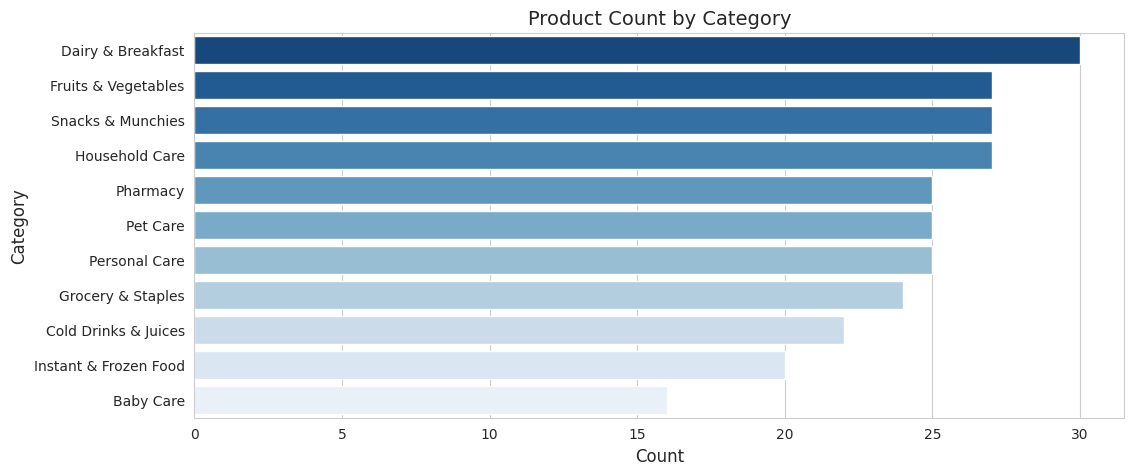

In [84]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, y="category", order=df["category"].value_counts().index, palette="Blues_r")
plt.title("Product Count by Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# 2. Brand-wise Product Count (Top 10 Brands)

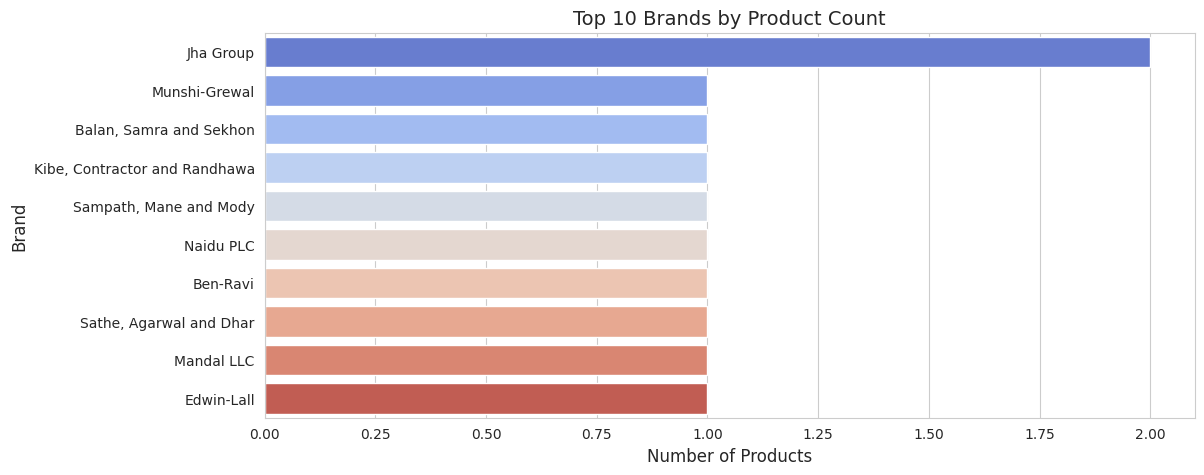

In [85]:
top_brands = df["brand"].value_counts().head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_brands.values, y=top_brands.index, palette="coolwarm")
plt.title("Top 10 Brands by Product Count")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.show()

# 3. Price vs MRP Scatter Plot

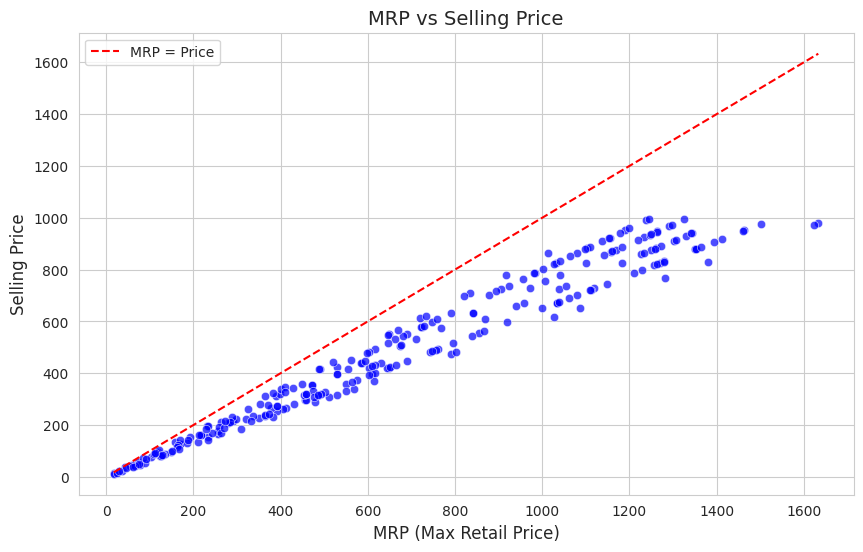

In [86]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="mrp", y="price", alpha=0.7, color="blue")
plt.plot([df["mrp"].min(), df["mrp"].max()], [df["mrp"].min(), df["mrp"].max()], "r--", label="MRP = Price")
plt.title("MRP vs Selling Price")
plt.xlabel("MRP (Max Retail Price)")
plt.ylabel("Selling Price")
plt.legend()
plt.show()

#  4. Margin Percentage Distribution

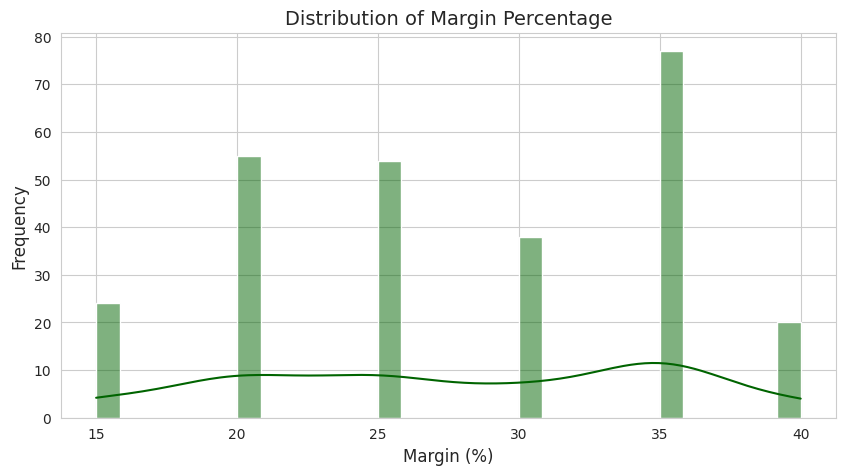

In [87]:
plt.figure(figsize=(10, 5))
sns.histplot(df["margin_percentage"], bins=30, kde=True, color="darkgreen")
plt.title("Distribution of Margin Percentage")
plt.xlabel("Margin (%)")
plt.ylabel("Frequency")
plt.show()

#  5. Shelf Life Distribution

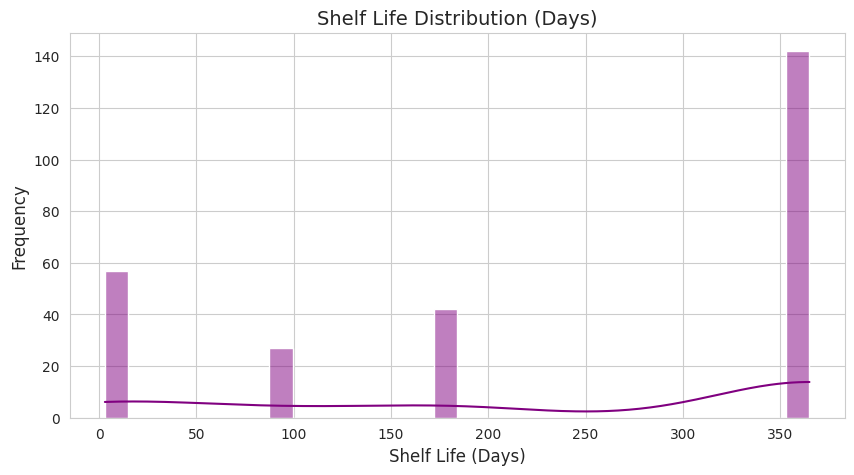

In [88]:
plt.figure(figsize=(10, 5))
sns.histplot(df["shelf_life_days"], bins=30, kde=True, color="purple")
plt.title("Shelf Life Distribution (Days)")
plt.xlabel("Shelf Life (Days)")
plt.ylabel("Frequency")
plt.show()

# 6. Min vs Max Stock Level

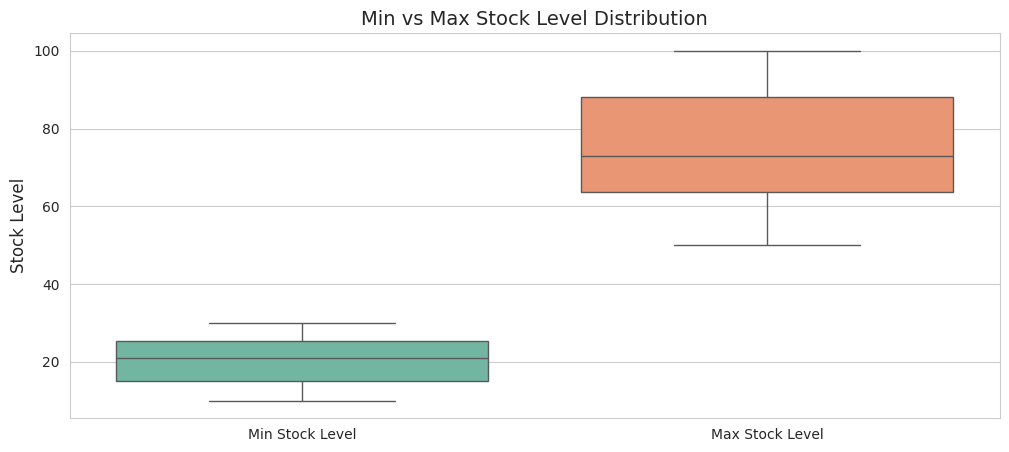

In [89]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[["min_stock_level", "max_stock_level"]], palette="Set2")
plt.title("Min vs Max Stock Level Distribution")
plt.ylabel("Stock Level")
plt.xticks(ticks=[0, 1], labels=["Min Stock Level", "Max Stock Level"])
plt.show()

# Load dataset

In [90]:
file_path = "/content/blinkit_products.csv"
df = pd.read_csv(file_path)

# Handle Missing Values

In [91]:
df.dropna(inplace=True)

# Label Encoding for Categorical Features

In [92]:
encoder_category = LabelEncoder()
encoder_brand = LabelEncoder()

In [93]:
df["category"] = encoder_category.fit_transform(df["category"])
df["brand"] = encoder_brand.fit_transform(df["brand"])

# Feature Selection

In [94]:
X = df.drop(columns=["product_id", "product_name", "price"])  # Features
y = df["price"]                                               # Target variable

# Train-Test Split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization

In [96]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train ML Models

In [97]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective="reg:squarederror", n_estimators=100, random_state=42)
}

# Store results

In [98]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({"Model": name, "MAE": mae, "MSE": mse, "R2 Score": r2})

# Convert results to DataFrame

In [99]:
results_df = pd.DataFrame(results)

# Visualization

In [100]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

# Bar chart for MAE

Text(0.5, 1.0, 'Mean Absolute Error (MAE)')

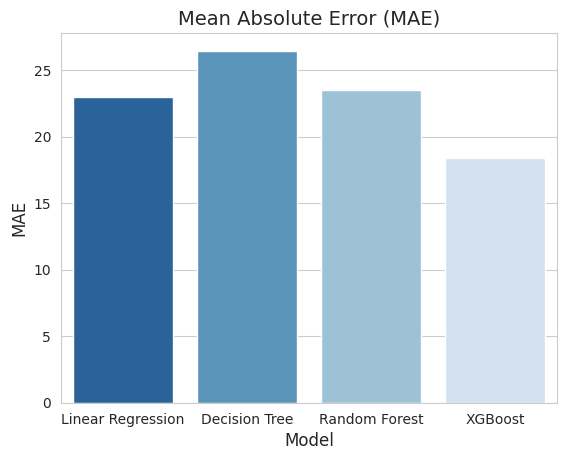

In [101]:
plt.plot
sns.barplot(data=results_df, x="Model", y="MAE", palette="Blues_r")
plt.title("Mean Absolute Error (MAE)")

# Bar chart for MSE

Text(0.5, 1.0, 'Mean Squared Error (MSE)')

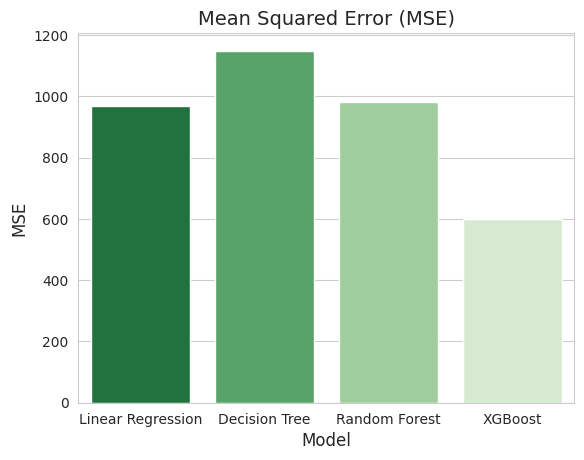

In [102]:
plt.plot
sns.barplot(data=results_df, x="Model", y="MSE", palette="Greens_r")
plt.title("Mean Squared Error (MSE)")

# Bar chart for R2 Score

Text(0.5, 1.0, 'R² Score')

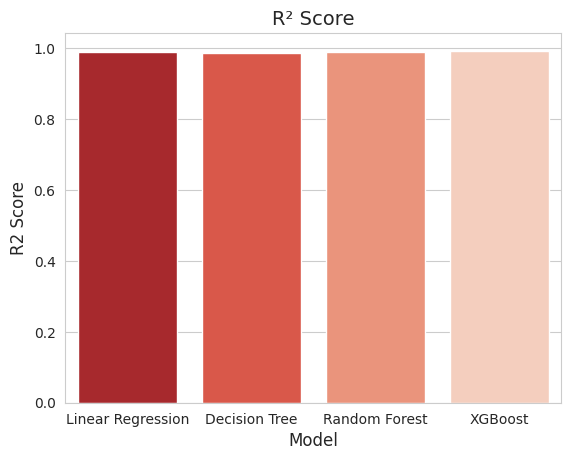

In [103]:
plt.plot
sns.barplot(data=results_df, x="Model", y="R2 Score", palette="Reds_r")
plt.title("R² Score")